# The I-94 Traffic Dataset

This anaylsis aim to determine what may lead to heavy traffic on interstate 94. Since the dataset only uses input about traffic moving east to west, our anaylsis will only be for westbound traffic (not general traffic i.e eastbound & westbound traffic).

The anaylsis will observe weather type, time of the day, time of the week, and more.

Observe our column data below:

| #   | Column               | Non-Null Count | Dtype    |
|-----|-----------------------|----------------|----------|
| 0   | holiday              | 61 non-null    | object   |
| 1   | temp                 | 48,204 non-null | float64  |
| 2   | rain_1h              | 48,204 non-null | float64  |
| 3   | snow_1h              | 48,204 non-null | float64  |
| 4   | clouds_all           | 48,204 non-null | int64    |
| 5   | weather_main         | 48,204 non-null | object   |
| 6   | weather_description  | 48,204 non-null | object   |
| 7   | date_time            | 48,204 non-null | object   |
| 8   | traffic_volume       | 48,204 non-null | int64    |



In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


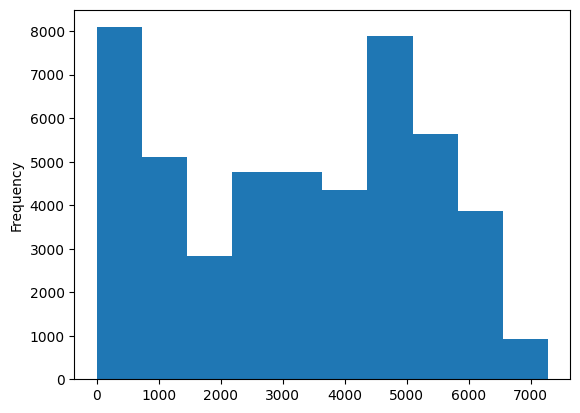

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

print(traffic['traffic_volume'].describe())

traffic['traffic_volume'].plot.hist()
plt.show()

Above, observe a histogram of the traffic volume. A histogram observes frequecies from default or determined ranges. Observe the number of times a frequency condition is met (on the y-axis) against the traffic volume amount (on the x-axis). 

| Statistic | Value        |
|-----------|--------------|
| Count     | 48,204.000000 |
| Mean      | 3,259.818355  |
| Std       | 1,986.860670  |
| Min       | 0.000000      |
| 25%       | 1,193.000000  |
| 50%       | 3,380.000000  |
| 75%       | 4,933.000000  |
| Max       | 7,280.000000  |


In [3]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
#print(traffic['date_time'].info())
daytime = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour <= 19)] # and operator
nighttime = traffic[(traffic['date_time'].dt.hour >= 19 ) | (traffic['date_time'].dt.hour <= 7)] # or operator

daytime.info()
nighttime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25838 entries, 0 to 48199
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              0 non-null      object        
 1   temp                 25838 non-null  float64       
 2   rain_1h              25838 non-null  float64       
 3   snow_1h              25838 non-null  float64       
 4   clouds_all           25838 non-null  int64         
 5   weather_main         25838 non-null  object        
 6   weather_description  25838 non-null  object        
 7   date_time            25838 non-null  datetime64[ns]
 8   traffic_volume       25838 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 26406 entries, 10 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --

* The daytime df shows a total of '25838' rows that meet the 7AM - 7PM hours requirements
* The nighttime df shows a total of '26406' rows that meet the nightime 7PM - 7AM hours requirements

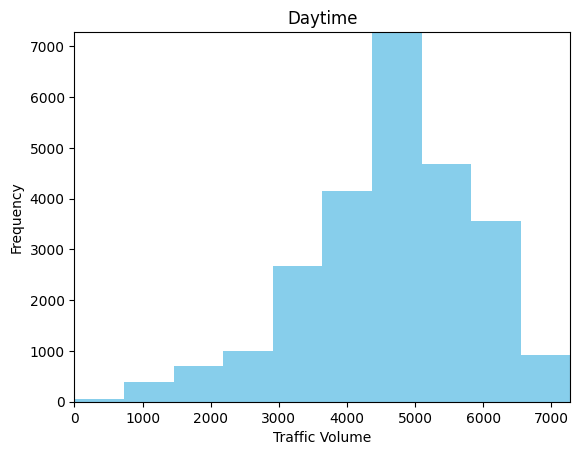

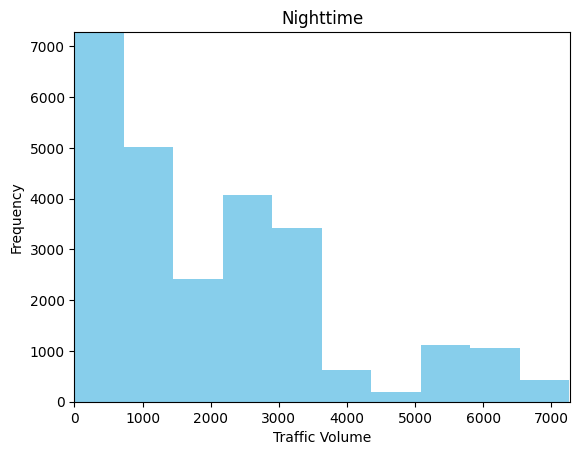

In [4]:
daytime['traffic_volume'].plot.hist(title='Daytime',
                                         xlabel='Traffic Volume',
                                         ylabel='Frequency',
                                         color='skyblue',
                                        xlim=(0,7280),
                                        ylim=(0,7280))
plt.show()

nighttime['traffic_volume'].plot.hist(title='Nighttime',
                                         xlabel='Traffic Volume',
                                         ylabel='Frequency',
                                         color='skyblue',
                                         xlim=(0,7280),
                                         ylim=(0,7280))
plt.show()

In [5]:
print(daytime['traffic_volume'].describe(), '\n\n', nighttime['traffic_volume'].describe())

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64 

 count    26406.000000
mean      2018.015375
std       1713.201969
min          0.000000
25%        581.000000
50%       1485.000000
75%       2934.000000
max       7260.000000
Name: traffic_volume, dtype: float64


Above we see that the Daytime histogram is left skewed. This indicates that higher traffic volume occurs more frequently in the daytime compared to lower traffic volume. This is justified by the df.decsribe() function where we see more than 50 perent of the data points exists within the upper bounds of the traffic volume (upper bounds is considered time periods approaching 7PM). 

Alternativley, night time is right skewed with the bulk of it's heavy traffic volume falling right at the beginning of the interval (7PM) and tapering off over night. This is justified by the df.decsribe() function where we see most data points exists within the upper bounds of the traffic volume (upper bounds is considered time periods approaching 7AM). 

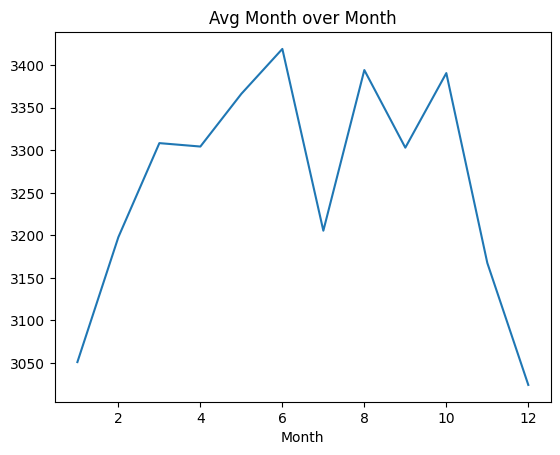

In [6]:
traffic['month'] = traffic['date_time'].dt.month
by_month = traffic.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']

plt.plot(by_month['traffic_volume'])
plt.title('Avg Month over Month')
plt.xlabel('Month')
plt.show()

* We aggregate our data by month
* We gather the mean for each month.
* We use the means to generate the plot graph

From the diagram we see that in the middle of the year (July) there is a steep decline in traffic. A deeper decline appears in december into the new year (Janurary). We can assume that the holiday seasons and/or school being out may impact the heaviness of traffic.  

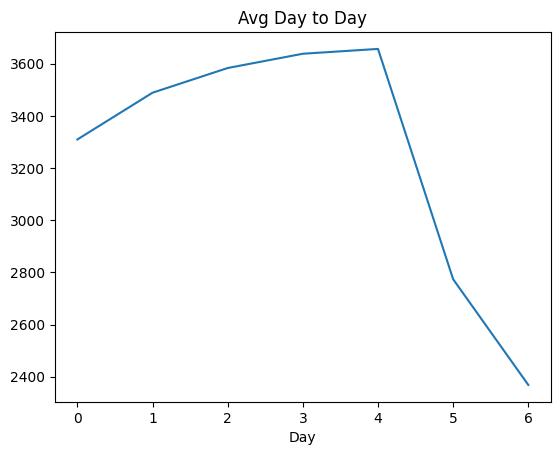

In [7]:
traffic['dayofweek'] = traffic['date_time'].dt.dayofweek
by_dayofweek = traffic.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume']

plt.plot(by_dayofweek['traffic_volume'])
plt.title('Avg Day to Day')
plt.xlabel('Day')
plt.show()

* We aggregate our data by dayofweek (Monday =0, Tuesday =1, etc)
* We gather the mean for each dayoftheweek.
* We use the means to generate the plot graph

The traffic volume typically increase from Monday to Thursday and begins to taper off by Friday evening and rapidly dropping on the weekends with the weekly low on Sunday. 


timeofday
0     1306.414035
1      805.128333
2      611.171986
3      393.611599
4      375.420168
5      639.237232
6     1089.100334
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64
timeofday
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64


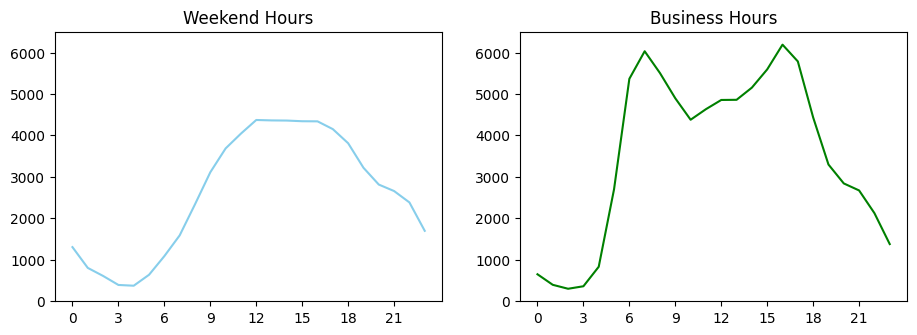

In [17]:
#split the data into business or weekends

traffic['timeofday'] = traffic['date_time'].dt.hour 
by_weekend = traffic[traffic['dayofweek'] >= 5].copy().groupby('timeofday').mean(numeric_only=True)
by_business = traffic[traffic['dayofweek'] <= 4].copy().groupby('timeofday').mean(numeric_only=True)

print(by_weekend['traffic_volume'])
print(by_business['traffic_volume'])

plt.figure(figsize=(11,3.5))

plt.subplot(1,2, 1) #( num or rows, num of cols, position)
plt.plot(by_weekend['traffic_volume'], 
         label='weekend hours',
         color='skyblue')
plt.title('Weekend Hours')
plt.ylim(0, 6500)
plt.xticks(range(0,24, 3))

plt.subplot(1,2,2)
plt.plot(by_business['traffic_volume'], 
         label='business hours',
         color='green')
plt.title('Business Hours')
plt.ylim(0, 6500)
plt.xticks(range(0,24, 3))
plt.show()

### Weekend Hours Observations:
* Traffic is highest around noon and remains steady until around 4PM where it tapers off.
* The morning time is the slowest time on the weekend

### Business Hours Observations:
* Traffic hits its first peak between 6AM - 9AM.
* Traffic falls from it's first peak by noon.
* Around noon the traffic begins to increase towards its second peak.
* Trafic hits its second peak between 3PM - 6PM.
* Average traffic is higher than most traffic during the weekend.

In [12]:
columns = ['temp',
           'rain_1h',
           'snow_1h', 
           'clouds_all']
correlations = {col: traffic[col].corr(traffic['traffic_volume']) for col in columns}
print(correlations)

{'temp': np.float64(0.13029879817112616), 'rain_1h': np.float64(0.0047137023678592745), 'snow_1h': np.float64(0.0007334345358283865), 'clouds_all': np.float64(0.0670537770428352)}


(230.0, 320.0)

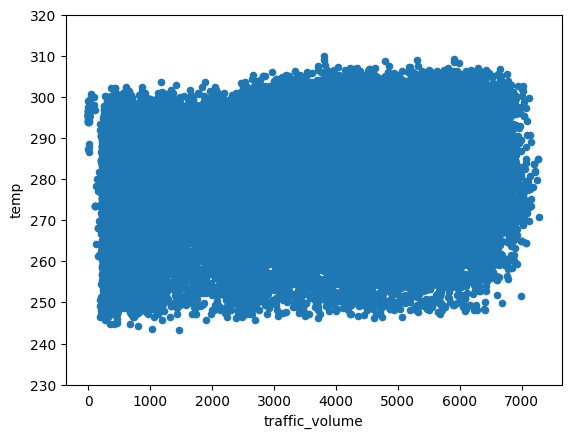

In [16]:
traffic.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320)

We see that there is a subtle positive correlation between traffic volume and temp. But this is not strong enough to draw any conclusions from. Perhaps we need to further refine by considering the weather types

<Axes: ylabel='weather_description'>

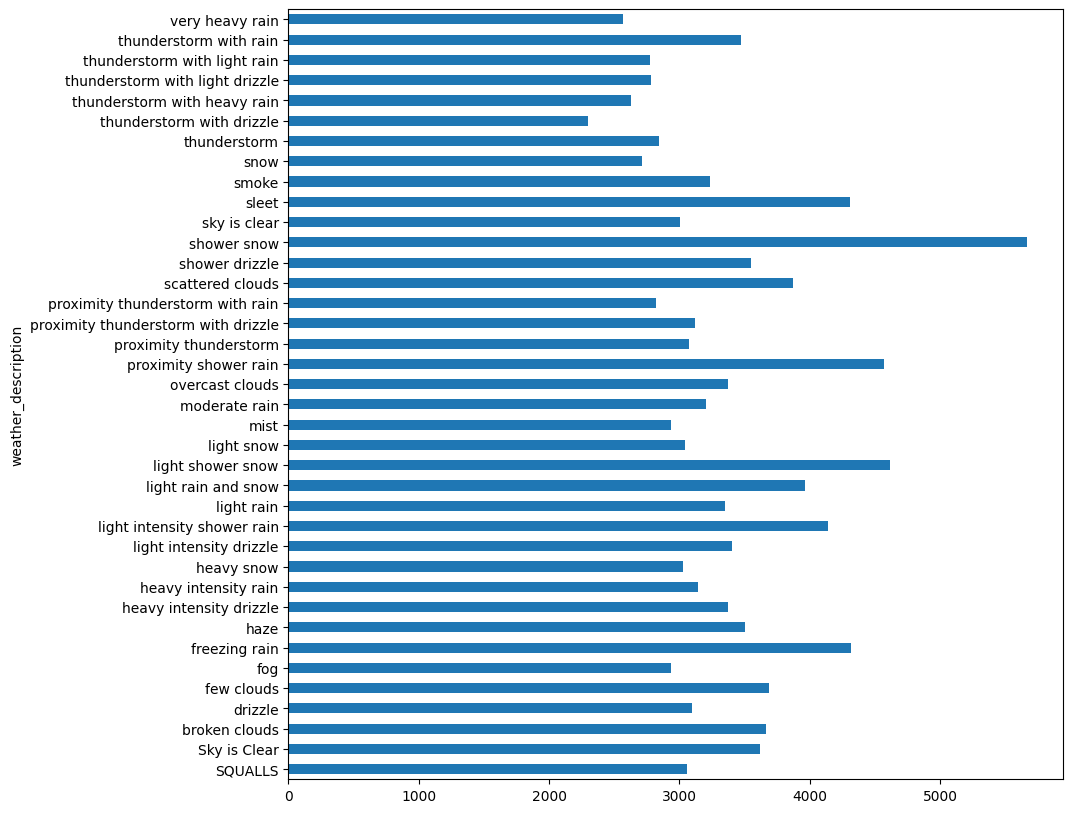

In [31]:
by_weather_main = traffic.groupby('weather_main').mean(numeric_only =True)
by_weather_description = traffic.groupby('weather_description').mean(numeric_only =True)

by_weather_main['traffic_volume'].plot.barh(figsize=(11,3.5))
by_weather_description['traffic_volume'].plot.barh(figsize=(10,10))

In conclusion., we see that weahter can impact traffic but nothing signficiant enoguh to draw any conslusions